In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# train 데이터셋 불러오기
train_path = "C:\\Users\\gadi2\\OneDrive\\바탕 화면\\study file\\Module36\\train.csv"
train_data = pd.read_csv(train_path)

# test 데이터셋 불러오기
test_path = "C:\\Users\\gadi2\\OneDrive\\바탕 화면\\study file\\Module36\\test.csv"
test_data = pd.read_csv(test_path)

# train 데이터셋 정보 확인
print("Train 데이터셋 정보:")
print(train_data.head())

# test 데이터셋 정보 확인
print("\nTest 데이터셋 정보:")
print(test_data.head())

Train 데이터셋 정보:
   rn  activity  tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  \
0   7  STANDING            0.279          -0.0196          -0.1100   
1  11  STANDING            0.277          -0.0127          -0.1030   
2  14  STANDING            0.277          -0.0147          -0.1070   
3  15  STANDING            0.298           0.0271          -0.0617   
4  20  STANDING            0.276          -0.0170          -0.1110   

   tBodyAcc.std.X  tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  \
0          -0.997          -0.967          -0.983          -0.997   
1          -0.995          -0.973          -0.985          -0.996   
2          -0.999          -0.991          -0.993          -0.999   
3          -0.989          -0.817          -0.902          -0.989   
4          -0.998          -0.991          -0.998          -0.998   

   tBodyAcc.mad.Y  ...  fBodyBodyGyroJerkMag.meanFreq  \
0          -0.966  ...                          0.146   
1          -0.974  ...             

In [24]:
# Feature 선택 (train 데이터셋에서)
target_column = 'activity'  # 예측할 대상 컬럼 이름 설정
X_train = train_data.drop(columns=[target_column, 'rn'])  # 'activity' 및 'rn' 컬럼 제거
y_train = train_data[target_column]

In [25]:
# Feature 선택 (test 데이터셋에서)
X_test = test_data.drop(columns=['rn'])  # 테스트 데이터의 'rn' 컬럼 제거

In [26]:
# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# K-means 클러스터링 모델 정의 및 학습
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=4, random_state=0)

In [28]:
# 각 데이터 포인트의 클러스터 할당 확인
train_cluster_labels = kmeans.labels_

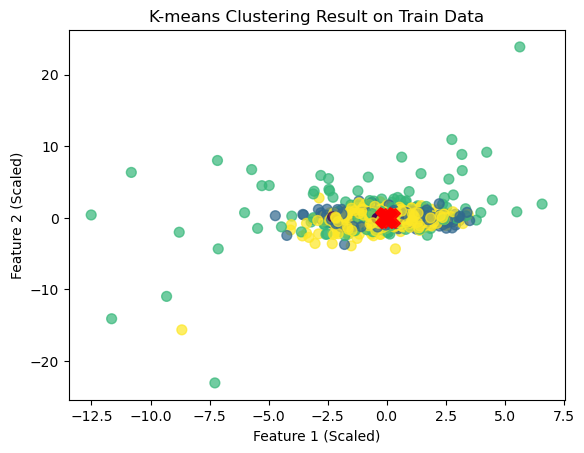

In [29]:
# 클러스터링 결과 시각화 (2차원 데이터셋을 가정)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.9, marker='X')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('K-means Clustering Result on Train Data')
plt.show()

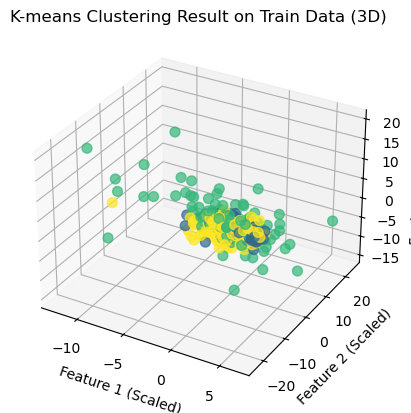

In [30]:
# 3차원 시각화
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], c=train_cluster_labels, cmap='viridis', s=50, alpha=0.7)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=200, alpha=0.9, marker='X')
ax.set_xlabel('Feature 1 (Scaled)')
ax.set_ylabel('Feature 2 (Scaled)')
ax.set_zlabel('Feature 3 (Scaled)')
ax.set_title('K-means Clustering Result on Train Data (3D)')
plt.show()

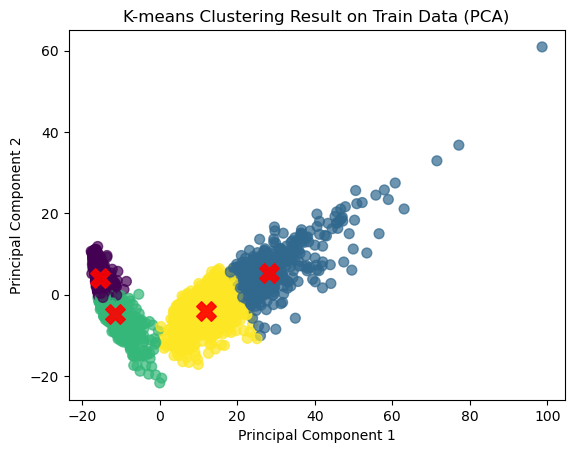

In [31]:
# 다차원 시각화
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 데이터 축소
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], c='red', s=200, alpha=0.9, marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Result on Train Data (PCA)')
plt.show()

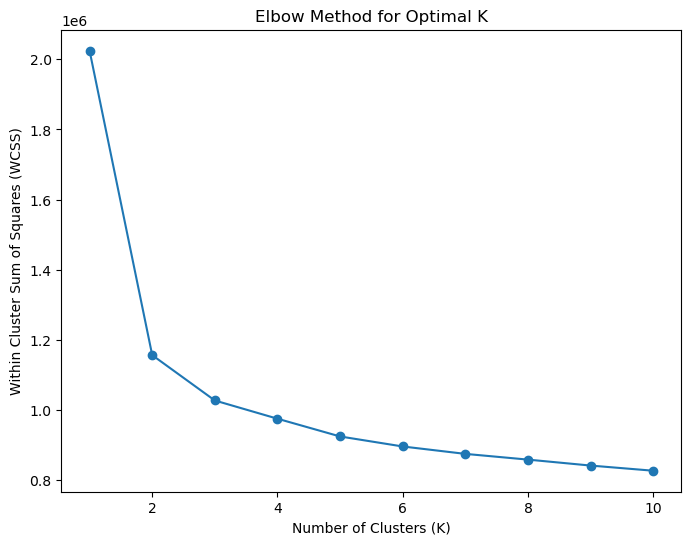

In [32]:
# 엘보우 방법을 사용하여 최적의 K 값 찾기
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)  # 클러스터 내 제곱합(WCSS) 저장

# WCSS 값 시각화 (엘보우 메서드)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()